# Results from Centralized vs. Distributed Node Experiment

Here, the different data generated in the centralized vs. distributed node experiment will be explored.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import plot_utils as pu
from model_compare import parse_snapshot

directory = "../model-snapshots/model-scope/split"

all_data = parse_snapshot.parse_all_snapshots(directory)
nodes = ['4120', '4121', '4122', '4125', '4127', '4133', '4134', '4138', '4143', '4144', '4147']
centralized_group_dict = {node_id : None for node_id in nodes}
distributed_group_dict = {node_id : None for node_id in nodes}


for data in all_data:
    for node_id in nodes:
        if node_id in data.filename:
            if 'centralized' in data.filename:
                centralized_group_dict[node_id] = data
            else:
                distributed_group_dict[node_id] = data

print(centralized_group_dict)
print(distributed_group_dict)

{'4120': Snapshot(filename='16-May-centralized-4120-rf.csv', month='May', day=16, model_name='centralized-4120-rf', data={'Model name': 'Central for Node 4120', 'Dataset name': 'oslo_3_month_aggregated_proc', 'Accuracy': 0.8152, 'Precision': 0.4385, 'Recall': 0.8676, 'Specificity': 0.806, 'F1 Score': 0.5826, 'AUC': 0.8368, 'True Negative Rate': 0.806, 'False Positive Rate': 0.194, 'False Negative Rate': 0.1324, 'True Positive Rate': 0.8676, 'AUPRC': 0.4001, 'G-Mean': 0.8362}), '4121': Snapshot(filename='16-May-centralized-4121-rf.csv', month='May', day=16, model_name='centralized-4121-rf', data={'Model name': 'Central for Node 4121', 'Dataset name': 'oslo_3_month_aggregated_proc', 'Accuracy': 0.9321, 'Precision': 0.4118, 'Recall': 0.7338, 'Specificity': 0.9429, 'F1 Score': 0.5276, 'AUC': 0.8384, 'True Negative Rate': 0.9429, 'False Positive Rate': 0.0571, 'False Negative Rate': 0.2662, 'True Positive Rate': 0.7338, 'AUPRC': 0.316, 'G-Mean': 0.8318}), '4122': Snapshot(filename='16-May-c

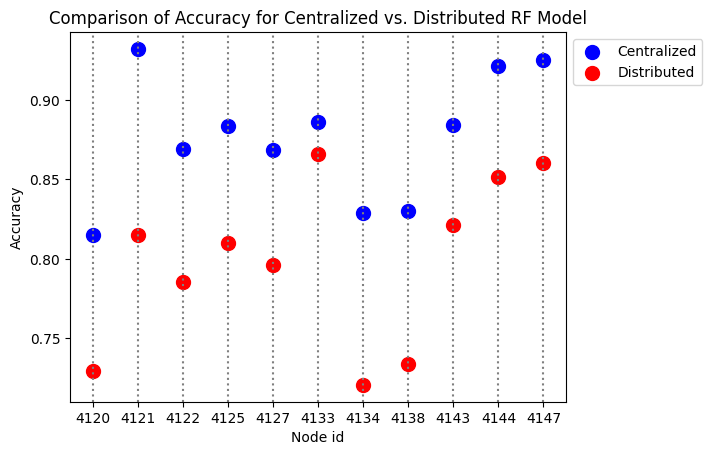

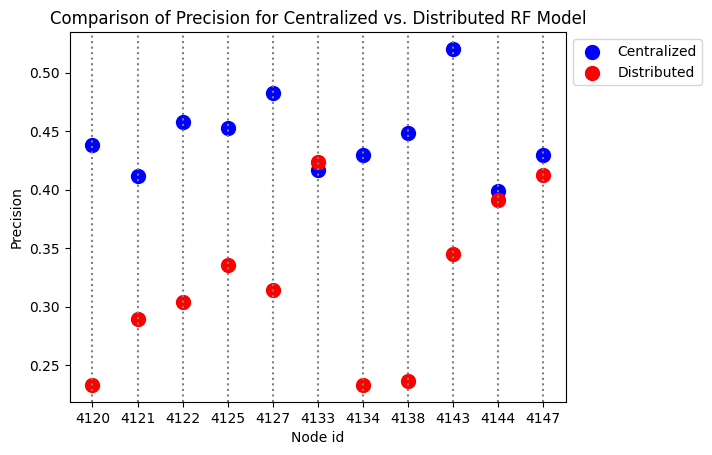

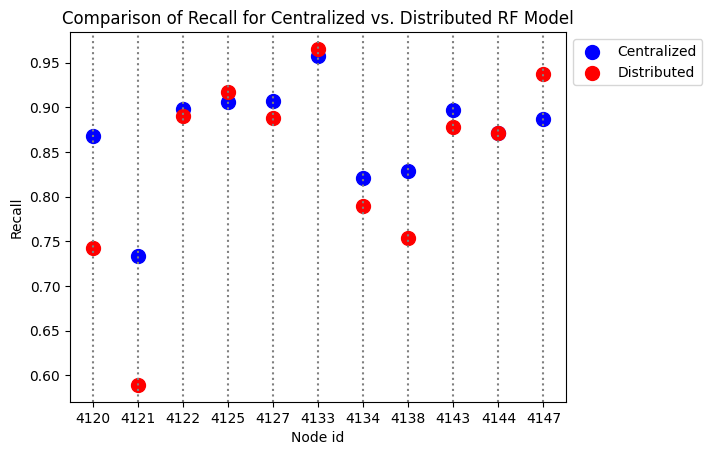

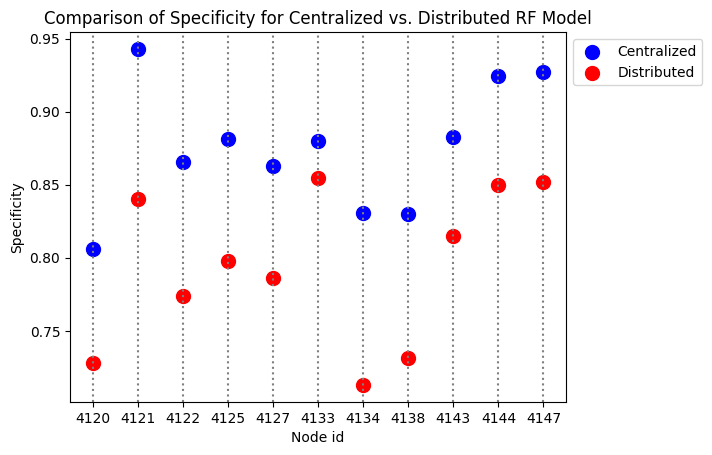

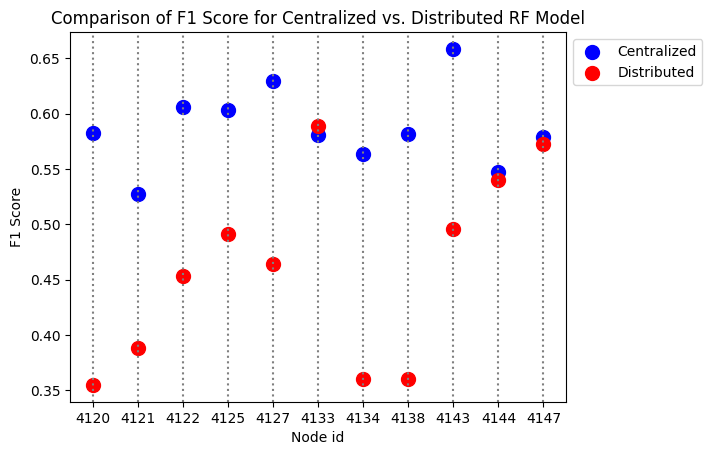

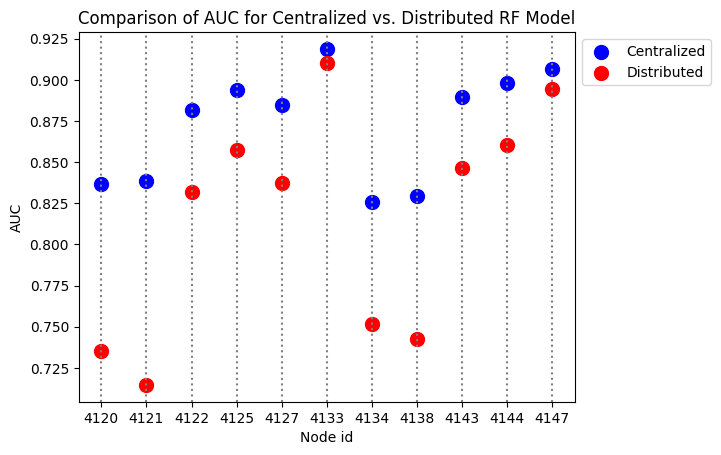

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def create_comparison_plot(categories, first_dataset, second_dataset, first_label, second_label, y_label, title, save):
    fig, ax = plt.subplots()
    x = np.arange(len(categories))  
    offset = 0

    for i in x:
        ax.axvline(i, linestyle=':', color='grey')

    ax.scatter(x - offset, first_dataset, color='blue', label=first_label, s=100)  
    ax.scatter(x + offset, second_dataset, color='red', label=second_label, s=100)  

    ax.set_ylabel(y_label)
    ax.set_xlabel('Node id')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(nodes)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    if save:
        plt.savefig(save, dpi=300, bbox_inches='tight')
    plt.show()


nodes = ['4120', '4121', '4122', '4125', '4127', '4133', '4134', '4138', '4143', '4144', '4147']

for data_name in list(centralized_group_dict.values())[0].data:
    if 'name' in data_name:
        continue
    try:
        centralized_data = [entry.data[data_name] for entry in centralized_group_dict.values()]
        distributed_data = [entry.data[data_name] for entry in distributed_group_dict.values()]
        create_comparison_plot(nodes, centralized_data, distributed_data, 
                            first_label='Centralized', second_label='Distributed', y_label=data_name, 
                            title=f'Comparison of {data_name} for Centralized vs. Distributed RF Model', save=f'./cent-vs-dist/centralized-{data_name}.png')
    except Exception:
        continue


